<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/BelEvSer_NLP_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as lda
from sklearn.datasets import make_multilabel_classification

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
! pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 54.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=ed6dae93f230404581a057262a1e5691dd7004d5cc1403b10a406ef9749f30eb
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [5]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving positive.csv to positive.csv


Saving negative.csv to negative.csv


In [6]:
data_pos = pd.read_csv('positive.csv', on_bad_lines='skip')

In [7]:
data_neg = pd.read_csv('negative.csv',on_bad_lines='skip')

In [8]:
data = data_pos.append(data_neg, ignore_index= False)

<ipython-input-8-7fc170481f17>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_pos.append(data_neg, ignore_index= False)


In [9]:
data

,"408906692374446080;""1386325927"";""pleease_shut_up"";""@first_timee хоть я и школота",но поверь,"у нас то же самое :D общество профилирующий предмет типа)"";""1"";""0"";""0"";""0"";""7569"";""62"";""61"";""0""","408906762813579264;""1386325944"";""dugarchikbellko"";""на работе был полный пиддес :| и так каждое закрытие месяца","я же свихнусь так D:"";""-1"";""0"";""0"";""0"";""8064"";""111"";""94"";""2"""
0,"408906692693221377;""1386325927"";""alinakirpiche...",все-таки он немного похож на него. Но мой мал...,NaN,NaN,NaN
1,"408906695083954177;""1386325927"";""EvgeshaRe"";""R...",NaN,NaN,NaN,NaN
2,"408906695356973056;""1386325927"";""ikonnikova_21...",а мы ещё 2 порции взяли,"хотя уже и так жрать не хотим"""" :DD http://t....",NaN,NaN
3,"408906761416867842;""1386325943"";""JumpyAlex"";""@...",NaN,NaN,NaN,NaN
4,"408906761769598976;""1386325943"";""JustinB942625...",NaN,NaN,NaN,NaN
...,...,...,...,...,...
112776,NaN,NaN,NaN,"425138243257253888;""1390195830"";""Yanch_96"";""Но...",NaN
112777,NaN,NaN,NaN,"425138339503943682;""1390195853"";""tkit_on"";""ску...","но я все равно скучаю"";""-1"";""0"";""0"";""0"";""4822..."
112778,NaN,NaN,NaN,"425138437684215808;""1390195876"";""ckooker1"";""Во...","в говно это идти уже надо("";""-1"";""0"";""0"";""1"";..."
112779,NaN,NaN,NaN,"425138490452344832;""1390195889"";""LisaBeroud"";""...","не грусти :( *обнял*"";""-1"";""0"";""1"";""0"";""2516""..."


In [10]:
data.columns

Index(['408906692374446080;"1386325927";"pleease_shut_up";"@first_timee хоть я и школота',
       ' но поверь',
       ' у нас то же самое :D общество профилирующий предмет типа)";"1";"0";"0";"0";"7569";"62";"61";"0"',
       '408906762813579264;"1386325944";"dugarchikbellko";"на работе был полный пиддес :| и так каждое закрытие месяца',
       ' я же свихнусь так D:";"-1";"0";"0";"0";"8064";"111";"94";"2"'],
      dtype='object')

In [11]:
data.columns = ['id', 'text', 'text_1', 'text_2', 'text_3']

In [12]:
data.head()

,id,text,text_1,text_2,text_3
0,"408906692693221377;""1386325927"";""alinakirpiche...",все-таки он немного похож на него. Но мой мал...,NaN,NaN,NaN
1,"408906695083954177;""1386325927"";""EvgeshaRe"";""R...",NaN,NaN,NaN,NaN
2,"408906695356973056;""1386325927"";""ikonnikova_21...",а мы ещё 2 порции взяли,"хотя уже и так жрать не хотим"""" :DD http://t....",NaN,NaN
3,"408906761416867842;""1386325943"";""JumpyAlex"";""@...",NaN,NaN,NaN,NaN
4,"408906761769598976;""1386325943"";""JustinB942625...",NaN,NaN,NaN,NaN


In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [14]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [15]:
cols = ['text', 'text_1', 'text_2', 'text_3']
data['combined'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [16]:
data.head()

,id,text,text_1,text_2,text_3,combined
0,"408906692693221377;""1386325927"";""alinakirpiche...",все-таки он немного похож на него. Но мой мал...,NaN,NaN,NaN,все-таки он немного похож на него. Но мой мал...
1,"408906695083954177;""1386325927"";""EvgeshaRe"";""R...",NaN,NaN,NaN,NaN,nan_nan_nan_nan
2,"408906695356973056;""1386325927"";""ikonnikova_21...",а мы ещё 2 порции взяли,"хотя уже и так жрать не хотим"""" :DD http://t....",NaN,NaN,а мы ещё 2 порции взяли_ хотя уже и так жрать...
3,"408906761416867842;""1386325943"";""JumpyAlex"";""@...",NaN,NaN,NaN,NaN,nan_nan_nan_nan
4,"408906761769598976;""1386325943"";""JustinB942625...",NaN,NaN,NaN,NaN,nan_nan_nan_nan


In [17]:
data['topics'] = 0

In [18]:
data.head()

,id,text,text_1,text_2,text_3,combined,topics
0,"408906692693221377;""1386325927"";""alinakirpiche...",все-таки он немного похож на него. Но мой мал...,NaN,NaN,NaN,все-таки он немного похож на него. Но мой мал...,0
1,"408906695083954177;""1386325927"";""EvgeshaRe"";""R...",NaN,NaN,NaN,NaN,nan_nan_nan_nan,0
2,"408906695356973056;""1386325927"";""ikonnikova_21...",а мы ещё 2 порции взяли,"хотя уже и так жрать не хотим"""" :DD http://t....",NaN,NaN,а мы ещё 2 порции взяли_ хотя уже и так жрать...,0
3,"408906761416867842;""1386325943"";""JumpyAlex"";""@...",NaN,NaN,NaN,NaN,nan_nan_nan_nan,0
4,"408906761769598976;""1386325943"";""JustinB942625...",NaN,NaN,NaN,NaN,nan_nan_nan_nan,0


In [19]:
topics = ['Экономика', 'Спорт', 'Культура', 'Путешествия', 
          'Наука и техника', 'Любовь', 'Учеба', 'Семья', 'Работа']



In [23]:
data.combined.iloc[5]

'900 :D ну это конечно же @twinkleAYO . Чтобы у нее было много друзей_ ведь она такая мимими &lt;3";"1";"0";"1";"0";"5169";"58";"43";"2"_nan_nan'

In [24]:
print(preprocess(data.combined.iloc[5]))

['это', 'twinkleayo', 'мимими']


In [25]:
data = data.sample(10000)

In [26]:
preprocessed_text = list(tqdm(map(preprocess, data['combined']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [27]:
data['combined'] = preprocessed_text
data.sample(2)

,id,text,text_1,text_2,text_3,combined,topics
96870,"410776611588673536;""1386771750"";""Katerina_Yp"";...","столько классных моментов"";""1"";""0"";""0"";""0"";""1...",NaN,NaN,NaN,"[столько, классный, момент]",0
119532,"411107028929490947;""1386850528"";""antyflex"";""Mu...",NaN,NaN,NaN,NaN,[],0


In [28]:
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from gensim.models import *
from gensim import corpora

In [30]:
dictionary = corpora.Dictionary(data['combined'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

In [31]:
corpus = [dictionary.doc2bow(text) for text in data['combined']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

In [32]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

CPU times: user 2.52 s, sys: 35.1 ms, total: 2.56 s
Wall time: 2.55 s


In [33]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(17,
  '0.261*"идти" + 0.231*"маленький" + 0.210*"школа" + 0.157*"ибо" + 0.000*"поход" + 0.000*"вообще" + 0.000*"смысл" + 0.000*"скучно" + 0.000*"знать" + 0.000*"время"'),
 (19,
  '0.643*"писать" + 0.131*"мозг" + 0.000*"дело" + 0.000*"никуда" + 0.000*"видеть" + 0.000*"каждый" + 0.000*"просто" + 0.000*"который" + 0.000*"ахи" + 0.000*"сердце"'),
 (9,
  '0.002*"случай" + 0.002*"любой" + 0.002*"сдать" + 0.002*"страна" + 0.002*"открыть" + 0.002*"каникулы" + 0.002*"сильно" + 0.002*"ужасно" + 0.002*"больно" + 0.002*"скорый"'),
 (1,
  '0.580*"хотеть" + 0.367*"год" + 0.000*"новый" + 0.000*"человек" + 0.000*"сегодня" + 0.000*"нибыть" + 0.000*"просто" + 0.000*"ёлка" + 0.000*"дом" + 0.000*"настроение"'),
 (18,
  '0.399*"работа" + 0.322*"большой" + 0.105*"пятница" + 0.011*"народ" + 0.000*"сегодня" + 0.000*"жизнь" + 0.000*"поэтому" + 0.000*"чувство" + 0.000*"фотка" + 0.000*"говорить"'),
 (16,
  '0.513*"крутой" + 0.001*"жизнь" + 0.001*"никто" + 0.001*"называться" + 0.001*"учиться" + 0.001*"никакой" 

In [34]:
print(lda.log_perplexity(corpus))

-24.957256404721523


In [35]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  1.4494433981563338e-11


In [47]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['combined'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.535163530255448


  0%|          | 0/5 [00:00<?, ?it/s]

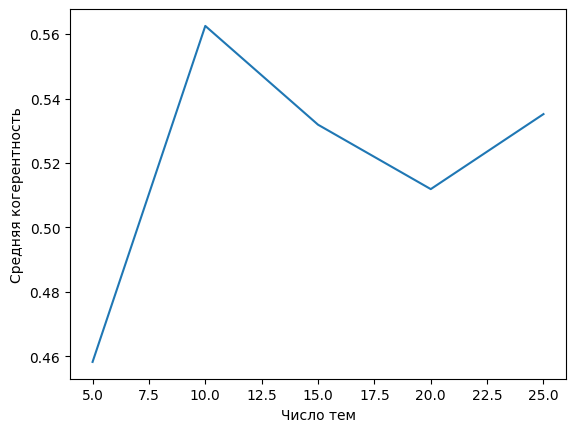

In [37]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['combined'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [45]:
!pip install pyLDAvis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary=lda.id2word)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
ERROR:concurrent.futures:exception calling callback for <Future at 0x7fdb72e917f0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following except

BrokenProcessPool: ignored